In [2]:
import os
from os import listdir
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/lancy/Desktop/Topics-Extraction-Hotel-Reviews/Nlp project/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv', header=0)
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [3]:
from wordcloud import WordCloud

def wc(df,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')

In [4]:
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
polarity=[]
for i in df['reviews.text']:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
    except:
        polarity.append(0)

In [6]:
df['polarity']=polarity

In [9]:
df.loc[:,"polarity"].max()

1.0

In [12]:
df.loc[:,"reviews.rating"].min()

1

In [25]:
bins = [-1, -0.6, -0.2, 0.4, 0.8, 1]
names = ['1','2','3','4','5']
df['new_polarity'] = pd.cut(df['polarity'], bins, labels=names)

In [26]:
comments = df[['name','reviews.text','polarity','new_polarity','reviews.rating']]
comments.head(20)

,name,reviews.text,polarity,new_polarity,reviews.rating
0,Best Western Plus South Coast Inn,"This hotel was nice and quiet. Did not know, t...",0.187500,3,3
1,Best Western Carmel's Town House Lodge,We stayed in the king suite with the separatio...,0.399524,3,4
2,Best Western Carmel's Town House Lodge,"Parking was horrible, somebody ran into my ren...",-0.350000,2,3
3,Best Western Carmel's Town House Lodge,Not cheap but excellent location. Price is som...,0.495238,4,5
4,Best Western Carmel's Town House Lodge,If you get the room that they advertised on th...,0.214286,3,2
5,21c Museum Hotel Lexington,"This is such a fun, lovely hotel. The attentio...",0.198077,3,4
6,21c Museum Hotel Lexington,We recently stayed at this hotel on a trip to ...,0.182143,3,1
7,Springs Motel LLC,"I reserved a room a week in advance, knowing a...",-0.400000,2,1
8,Microtel Inn Suites By Wyndham Lexington,MoreMore,0.000000,3,5
9,American Inn,"Hello, I have traveled a lot and abroad and by...",-0.342857,2,1


In [51]:
#positive comments
pos_com = df[['name','reviews.text','polarity']][df.polarity>0]
pos_com.head()

,name,reviews.text,polarity
0,Best Western Plus South Coast Inn,"This hotel was nice and quiet. Did not know, t...",0.187500
1,Best Western Carmel's Town House Lodge,We stayed in the king suite with the separatio...,0.399524
3,Best Western Carmel's Town House Lodge,Not cheap but excellent location. Price is som...,0.495238
4,Best Western Carmel's Town House Lodge,If you get the room that they advertised on th...,0.214286
5,21c Museum Hotel Lexington,"This is such a fun, lovely hotel. The attentio...",0.198077


In [52]:
#negative comments
neg_com = df[['name','reviews.text','polarity']][df.polarity<0]
neg_com.head()

,name,reviews.text,polarity
2,Best Western Carmel's Town House Lodge,"Parking was horrible, somebody ran into my ren...",-0.350000
7,Springs Motel LLC,"I reserved a room a week in advance, knowing a...",-0.400000
9,American Inn,"Hello, I have traveled a lot and abroad and by...",-0.342857
15,The Whitney Hotel,"This Hotel, formerly a prestigious bank, may b...",-0.041127
94,"Marriott Vacation Club Pulse, San Diego",accused of smoking in my room. only young blac...,-0.150852


In [53]:
pos_com.count()

name            9469
reviews.text    9469
polarity        9469
dtype: int64

In [54]:
neg_com.count()

name            494
reviews.text    494
polarity        494
dtype: int64

In [55]:
#neutral comments
#df[['name','reviews.text','polarity']][df.polarity==0].head(20)

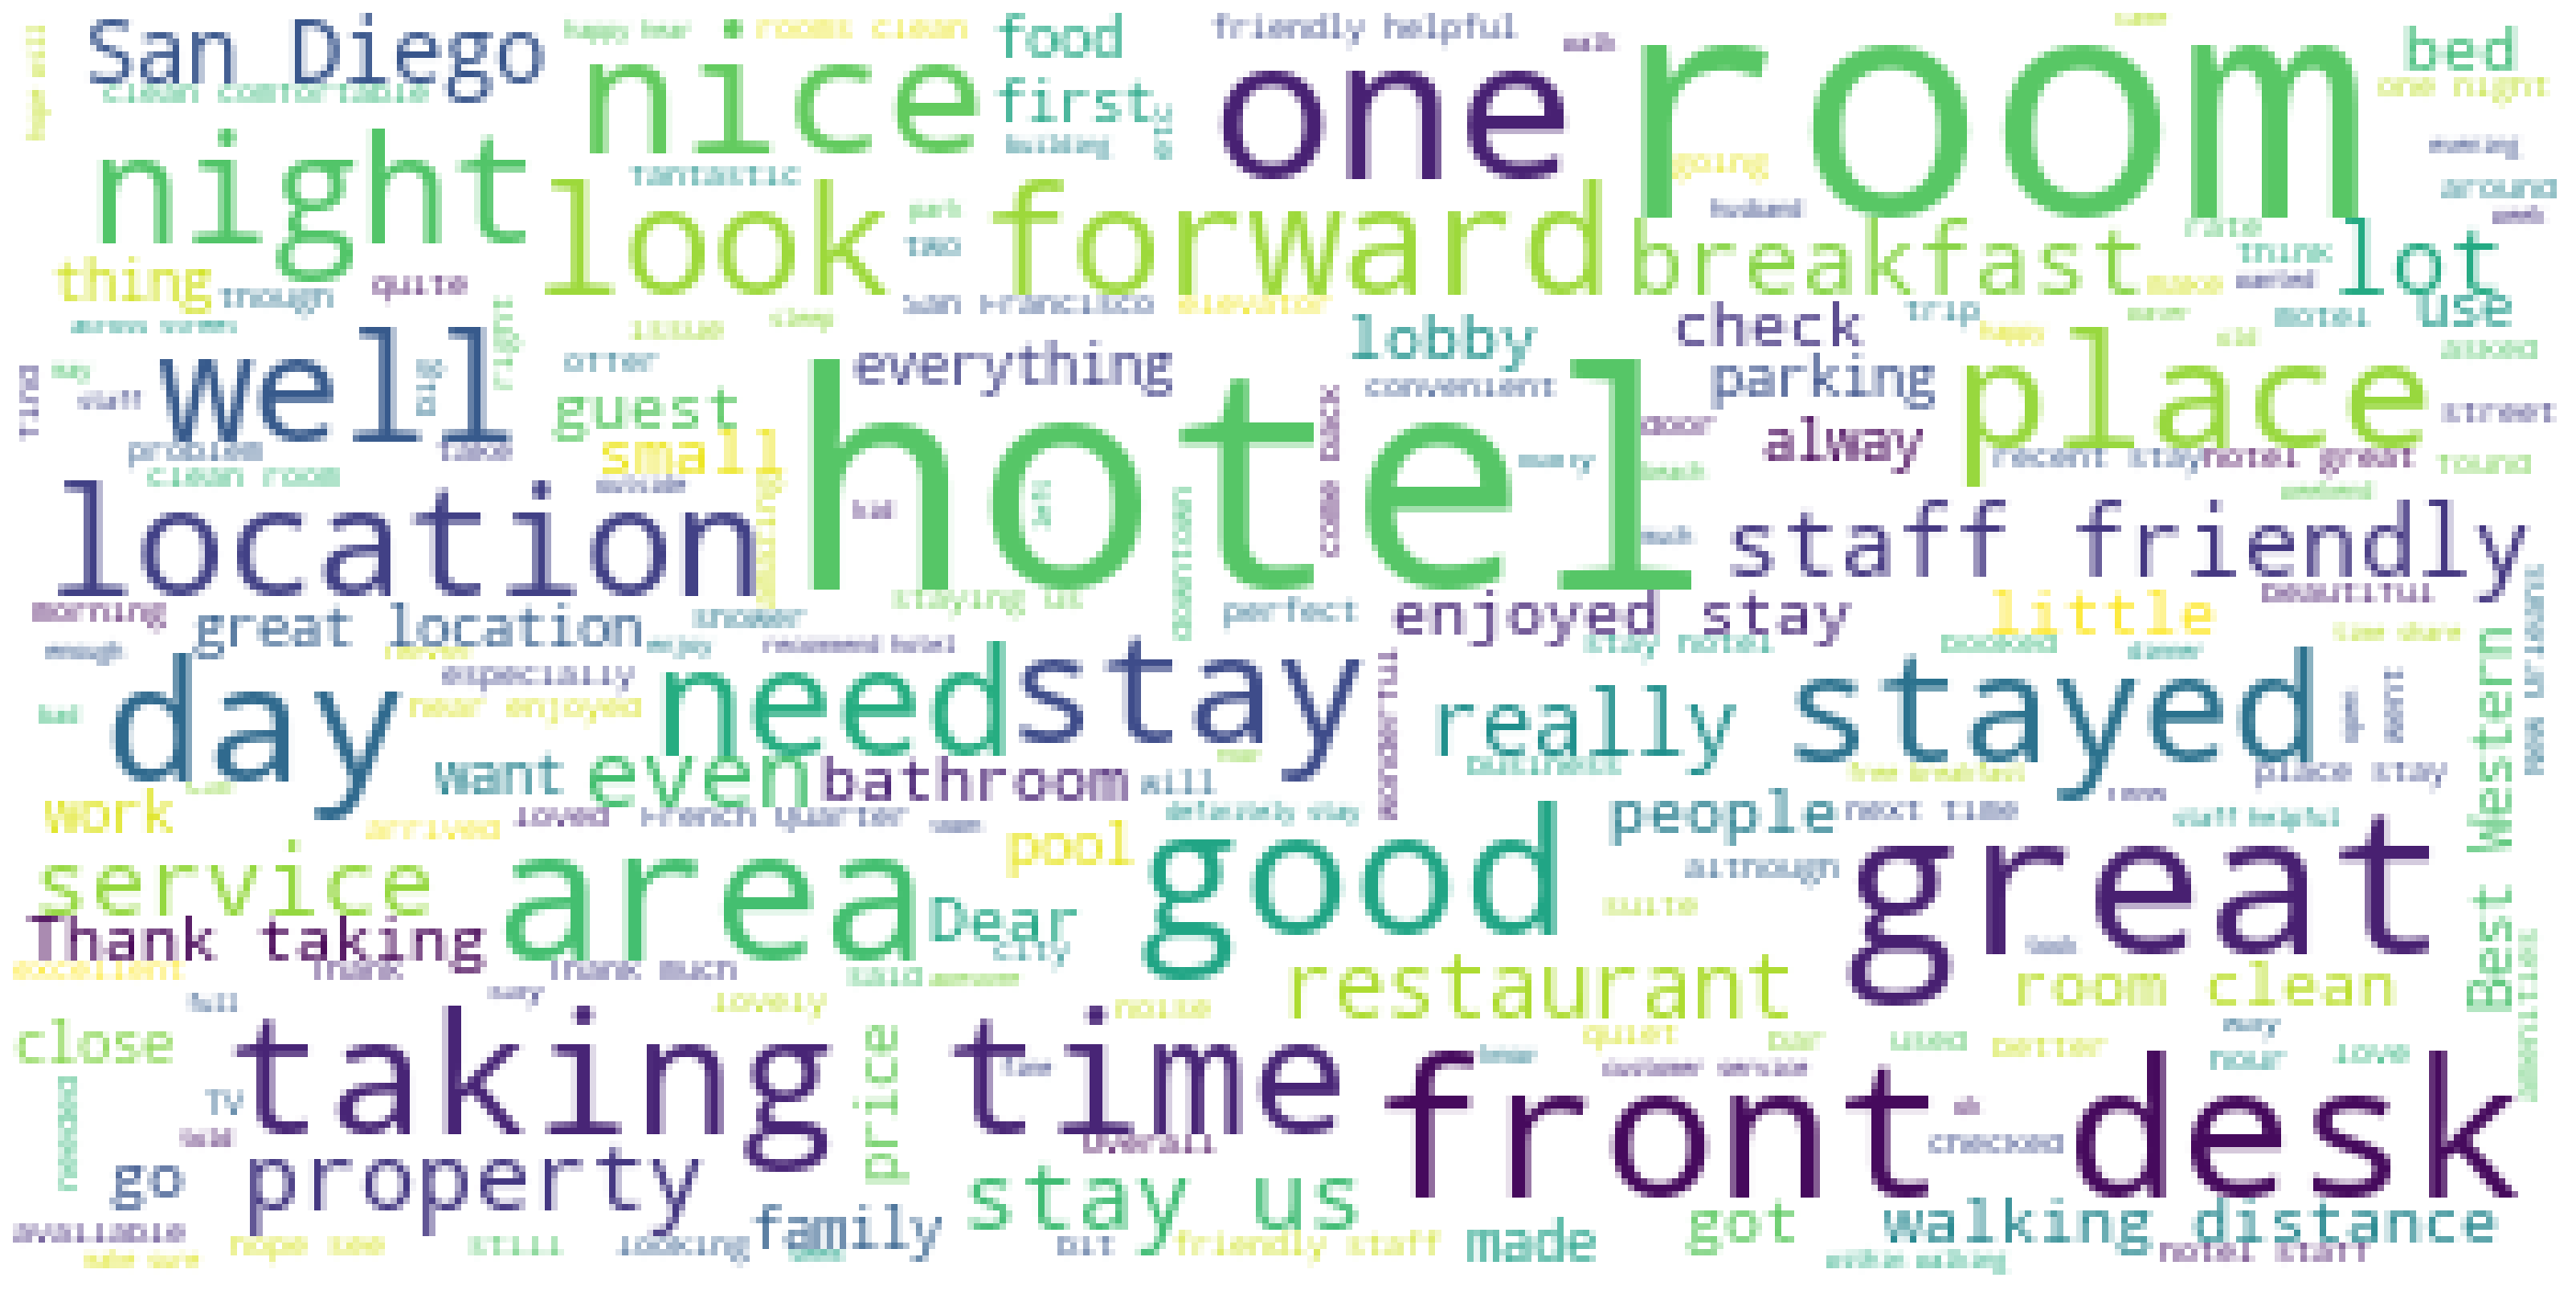

In [56]:
#highly positive reviews
wc(df['reviews.text'][df.polarity>0],'white','Common Words' )

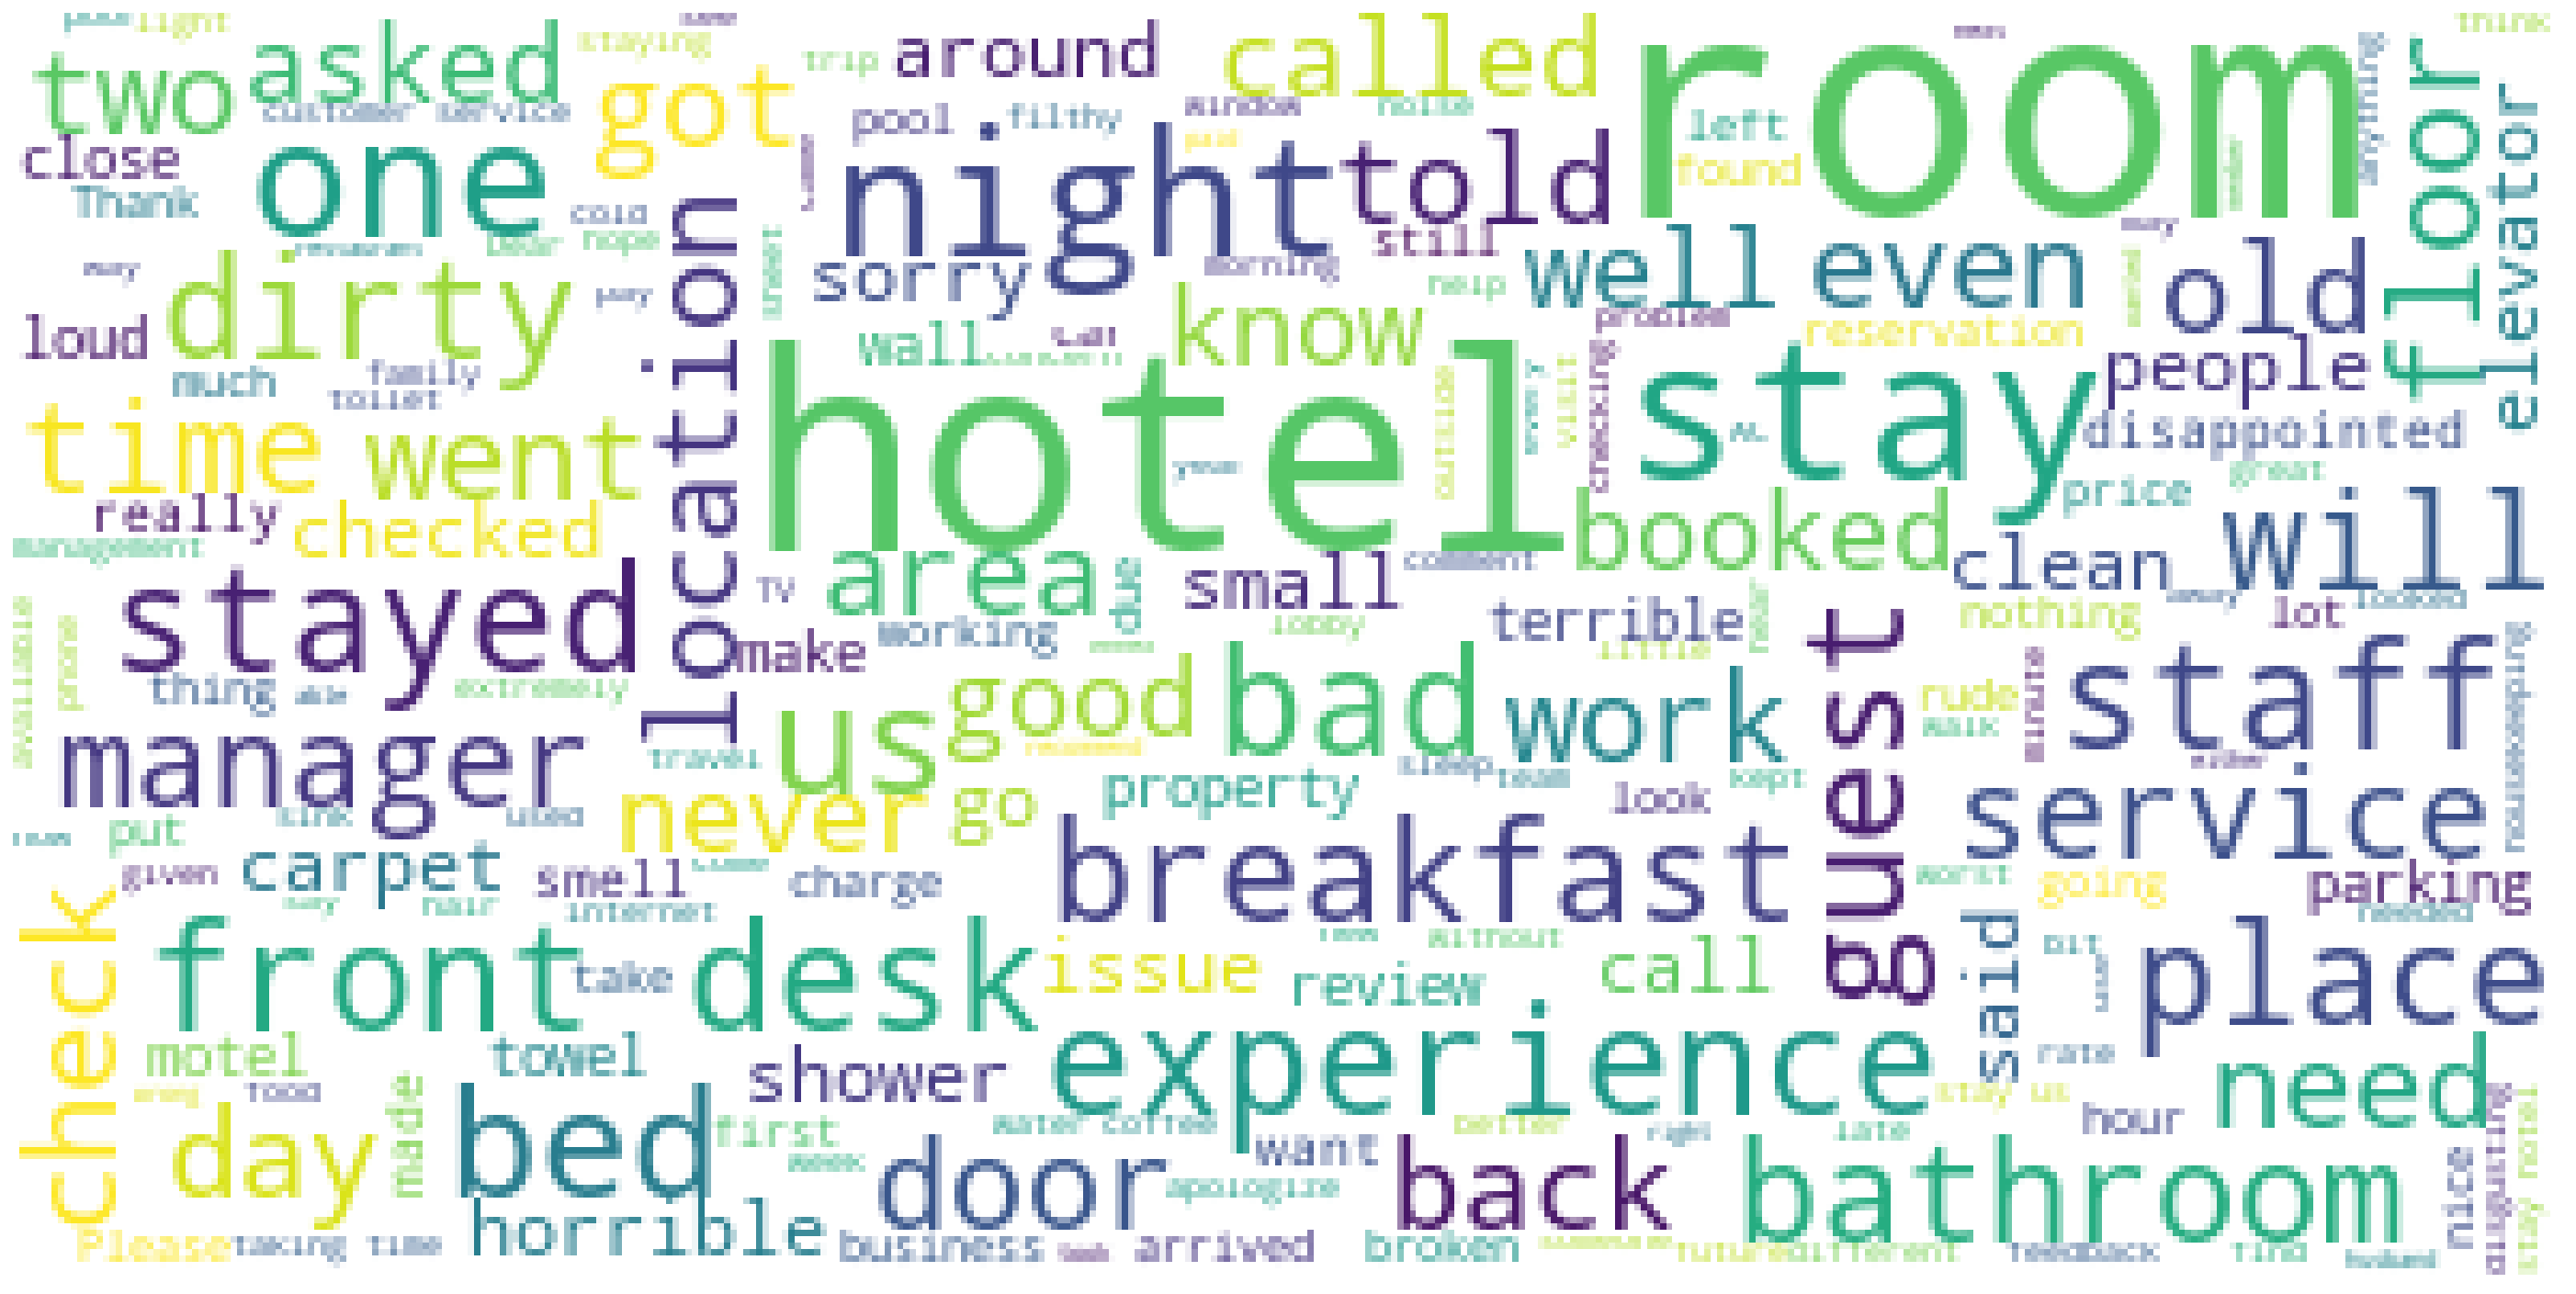

In [57]:
#highly negative reviews
wc(df['reviews.text'][df.polarity<0],'white','Common Words' )

In [58]:
#df['polarity'][df.polarity==0]= 0
df['polarity'][df.polarity > 0]= 1
df['polarity'][df.polarity < 0]= -1

 1.0    9469
-1.0     494
 0.0      37
Name: polarity, dtype: int64

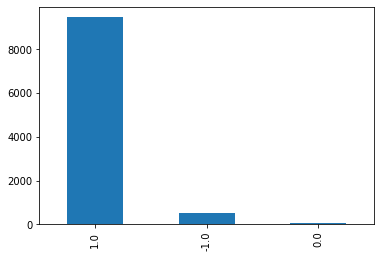

In [59]:
df.polarity.value_counts().plot.bar()
df.polarity.value_counts()